### Convolutional Neural Network - Image Augmentation

The flower dataset is relatively small. A way to expand such datasets is to generate artificial images by applying small transformations to existing images. Keras provides a built-in class for this: ImageDataGenerator. You will reuse it and apply it to the flower data set.
- Using the network from the previous exercise, apply some transformations to your images. You can start from Chollet, Listing 5.11.

#### Scale Images

In [1]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

TRAIN_DIR = 'flowers_split/train'
VAL_DIR = 'flowers_split/validation'
TEST_DIR = 'flowers_split/test'


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( 
    VAL_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory( 
    TEST_DIR,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    class_mode='categorical')


Using TensorFlow backend.


Found 2654 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [4]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


#### Build Model

In [5]:
from keras import layers
from keras import models

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
#model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(5, activation='softmax'))


#### Compile

In [6]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### Fit the model

In [7]:
history = model.fit_generator( train_generator,
      steps_per_epoch=2654//20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=865//20)

Epoch 1/50
132/132 [==============================] - 52s 391ms/step - loss: 1.3615 - acc: 0.3899 - val_loss: 1.4949 - val_acc: 0.4512
Epoch 2/50
132/132 [==============================] - 50s 378ms/step - loss: 1.2063 - acc: 0.4806 - val_loss: 1.2027 - val_acc: 0.5325
Epoch 3/50
132/132 [==============================] - 45s 339ms/step - loss: 1.1471 - acc: 0.5266 - val_loss: 0.8150 - val_acc: 0.5491
Epoch 4/50
132/132 [==============================] - 48s 362ms/step - loss: 1.1082 - acc: 0.5509 - val_loss: 0.8006 - val_acc: 0.5527
Epoch 5/50
132/132 [==============================] - 46s 348ms/step - loss: 1.0610 - acc: 0.5759 - val_loss: 0.9945 - val_acc: 0.5716
Epoch 6/50
132/132 [==============================] - 48s 366ms/step - loss: 1.0111 - acc: 0.5998 - val_loss: 1.0161 - val_acc: 0.6083
Epoch 7/50
132/132 [==============================] - 46s 349ms/step - loss: 0.9814 - acc: 0.6082 - val_loss: 0.9964 - val_acc: 0.6296
Epoch 8/50
132/132 [==============================] - 4

#### Save the model

In [56]:
model.save('flower_picker_x1000_50.h5')

#### Load the model

In [3]:
from keras.models import load_model
model = load_model('flower_picker_x1000_50.h5')

#### Display Loss and Acc

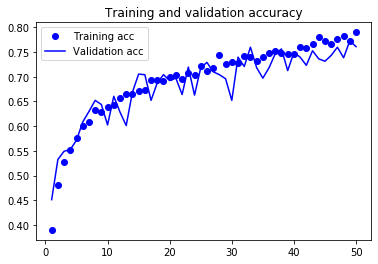

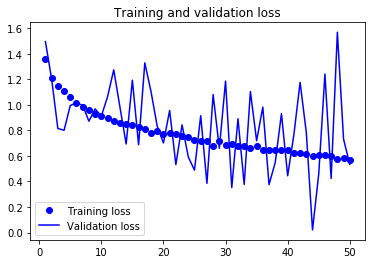

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)
print('test loss:', test_loss)

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

test acc: 0.7878172397613525
test loss: 0.3075708746910095
Confusion Matrix
[[145  12  10   4   4]
 [ 16 174   3   5   5]
 [ 12   7 115   3  21]
 [  5  21   4 106   4]
 [  5  10  26   6 142]]
Classification Report
              precision    recall  f1-score   support

       Daisy       0.79      0.83      0.81       175
   Dandelion       0.78      0.86      0.81       203
        Rose       0.73      0.73      0.73       158
   Sunflower       0.85      0.76      0.80       140
       Tulip       0.81      0.75      0.78       189

    accuracy                           0.79       865
   macro avg       0.79      0.78      0.79       865
weighted avg       0.79      0.79      0.79       865

